In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

In [2]:
reviews = pd.read_csv('input/df_with_title2.csv')
features = pd.read_csv('input/final_features_data.csv')

In [3]:
total = pd.merge(reviews, features, how = "inner", on = "asin")

In [4]:
print(reviews.shape)
print(reviews.columns)

(22927, 10)
Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'title'],
      dtype='object')


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22927 entries, 0 to 22926
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            22927 non-null  object
 1   helpful         22927 non-null  object
 2   overall         22927 non-null  int64 
 3   reviewText      22912 non-null  object
 4   reviewTime      22927 non-null  object
 5   reviewerID      22927 non-null  object
 6   reviewerName    21941 non-null  object
 7   summary         22926 non-null  object
 8   unixReviewTime  22927 non-null  int64 
 9   title           22927 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.7+ MB


In [6]:
reviews.describe()

,overall,unixReviewTime
count,22927.000000,2.292700e+04
mean,4.087888,1.356391e+09
std,1.248639,3.599225e+07
min,1.000000,1.077149e+09
25%,4.000000,1.345162e+09
50%,5.000000,1.362096e+09
75%,5.000000,1.379117e+09
max,5.000000,1.406074e+09


# TOP 10 PRODUCTS

In [7]:
rating = reviews.groupby('title').describe()['overall']
rating = rating.sort_values('mean', ascending = False)[['mean']]
rating.head(10)

,mean
title,
i.Trek Super Mount Metal Smartphone Tripod Adapter and Stand - Retail Packaging - Yellow,5.0
"Premium Soft Argyle Flexi TPU Gel Skin Case Cover for Samsung Fascinate, Clear Checkers",5.0
Samsung AT&T INFUSE 4G SGH-i997 Battery Charger with Stand [ET-CGPK002GSTA] - Retail Packaging - Black,5.0
"Black Leather Pouch Carrying Case w/Belt Clip and Loops for HTC Evo 4G, HD2, ...",5.0
Samsung ET-CGPK009GSTA Sprint SPH-D710 Battery Charger with Stand - Charger - Retail Packaging - Black,5.0
Belkin USB Charger + Sync / Charge Cable for Apple iPhone (Black),5.0
Wilson Electronics 4-inch 4G Mini Magnet-Mount Antenna w/ SMA Male Connector,5.0
"Ballistic SG Black Silicone, Black TPU, and Black PC for Samsung Nexus S and Samsung Nexus S 4G - 1 Pack - Case - Retail Packaging",5.0
"RAVPower 3100mAh Li-ion Battery For Samsung Galaxy Note 2/II, GT-N7100, SCH-I605(Verizon), SCH-R950(U.S. Cellular), SGH-I317(AT&T), SGH-T889(T-Mobile), SPH-L900(Sprint), fits Samsung EB595675LA",5.0


# MOST POPULAR PRODUCT

In [8]:
from collections import Counter
productTypeCount = Counter(list(reviews['title']))
productTypeCount.most_common(10)

[('iPhone 4 / 4S Anti-Glare, Anti-Scratch, Anti-Fingerprint - Matte Finishing Screen Protector',
  694),
 ('iOttie  Easy One Touch Car Mount Holder for iPhoneX 8 7s 6s Plus 6s 5s 5c Samsung Galaxy S9 S8 Edge S7 S6',
  557),
 ('Galaxy S3 Case, Caseology [Daybreak Series] Slim Fit Shock Absorbent Cover [Pink] [Slip Resistant] for Samsung Galaxy S3 - Pink',
  510),
 ('Stylus Pen, New Trent Arcadia (1PC) Limir [Dual Purpose] Stylus/Styli for Capacitive Touch Screen Smartphones and Tablets. [2-in-1: Stylus Micro-Knit Tip + Fine Ball Pen]',
  348),
 ('External Battery, New Trent iCarrier 12000mAh Portable Dual USB Port External Battery Charger/Power Pack for Smartphones, iPhone 6, Iphone 6 Plus, S5, Nexus 6, Note 4, Tablets, iPad Air 2, iPad mini 3, and more (Now w/Micro-USB charge port)',
  339),
 ('iPhone 4 Screen Protector, Tech Armor High Definition HD-Clear Apple iPhone 4 / 4S Film Screen Protector [3-Pack]',
  325),
 ('New Trent: iTorch 5200mAh Ultra Portable USB Port External Battery 

# RECOMMENDATION SYSTEM

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack

In [10]:
reviewsCopy = reviews.copy()
reviewsSorted = reviews.sort_values('title', ascending = False)

In [11]:
reviewsSorted.head(10)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
3612,B003U4TLL2,"[0, 0]",1,"second try with these, same result for my setu...","07 8, 2013",A2HP63L85NI0CC,"Greg Fridder ""Fridder""","2nd try same result, no workie",1373241600,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3605,B003U4TLL2,"[5, 6]",2,I cant say I am completely unhappy with this d...,"03 23, 2012",A2IKMRNKQ12ZPT,"Amazon.Buyer ""Never argue with an 1d10t...the...",The Boost in the name and description is misle...,1332460800,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3938,B003VOW5WI,"[0, 1]",1,"Doesn't works, I have the same problem, no pho...","07 13, 2014",A2Y8WWR06KCIUZ,Ezio,no recommended,1405209600,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3937,B003VOW5WI,"[1, 1]",4,this booster...in a word...works!It does what ...,"03 31, 2013",ADZNLCXNYH3FN,"Dwight Howard ""dahoward77""",To extend in weak cell areas,1364688000,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3936,B003VOW5WI,"[1, 1]",5,I am a freak at insulating my home. Aluminum ...,"07 9, 2013",AQCA8WBO82VQH,Duncan Cunningham,It works - If only for up to 3G,1373328000,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3935,B003VOW5WI,"[848, 866]",5,"This review ran a bit longer than I expected, ...","10 2, 2010",ATFBVUXDIRXT6,D. Matheny,Perfect 5-bar solution when installed correctly!,1285977600,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3934,B003VOW5WI,"[1, 1]",1,tried this piece of junk at three different si...,"02 14, 2013",A3SMOIJ8TF3V4U,dirkjal,total unadulterated crap,1360800000,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3933,B003VOW5WI,"[2, 2]",5,Something you might want to do is have a high ...,"01 8, 2014",A2UFJUXRBBZ8UU,"David Sandbeck ""hallgrd""","This works, as a plug and play solution for po...",1389139200,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3932,B003VOW5WI,"[1, 1]",5,"Put the external antenna in the attic, ran the...","07 23, 2013",AZDKXWAE79HJ9,"C. Ray ""GaDisciple""",Perfect Solution,1374537600,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3931,B003VOW5WI,"[0, 0]",3,The product does seem to increase the availabl...,"09 18, 2011",A8JP7MZH2S3X3,cardton,works ok but if you have sprint...,1316304000,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...


In [12]:
reviewsUnique = reviewsSorted.drop_duplicates(subset = 'asin', keep = "last")

In [13]:
print(reviewsUnique.shape)
reviewsUnique.head(10)

(1184, 10)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
3943,B003VOW5WI,"[0, 0]",5,WOW!!! Works great. Put it up on the roof. Pro...,"12 20, 2011",A3B4TRVL7JYHHD,"Lious Friend ""Credo ut intelligam""",Great cell phone booster!,1324339200,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
3606,B003U4TLL2,"[0, 0]",4,"Works as advertised, suction cups kind of chee...","09 19, 2013",A1MASW50Z8DVXH,ArvadaDude,Wireless extender,1379548800,zBoost ZB545 SOHO Dual Band Cell Phone Signal ...
7631,B0048IZL5E,"[0, 0]",4,Surprisingly snug on the sides for the touch. ...,"05 15, 2014",AXO4PQU0XG3TG,Dwight,Fits iPod touch with some headroom,1400112000,uNu Power DX PLUS External Protective Battery ...
15534,B006R94O7I,"[1, 1]",4,"These aren't too bad, love the matte back prot...","01 30, 2012",A17K8TKHWF8MWZ,CheetahTrans,Nice screen protectors,1327881600,splash MASQUE Screen Protector Film Clear (Inv...
15729,B006UYDCI2,"[0, 0]",5,This came in early and exactly like the pictur...,"05 12, 2013",A3A61D0Z02NW8,Baines,What you see is what you get!,1368316800,niceeshop(TM) White 3D Bling Crystals Rhinesto...
18623,B007SRWDUI,"[0, 0]",5,The color is a tad greener than the photo yet ...,"03 4, 2013",A1S67AHQEO3U13,Victoria,Green Polka Dot Gel Case Iphone 4,1362355200,niceeshop Green&White HM Polka Dots Gel Flexib...
8554,B004GJMTHS,"[0, 0]",5,Very pretty color. Easy to put on. Took a ve...,"12 4, 2012",A2YQF017D4AO0S,Dorothy Ebacher,purple case,1354579200,niceEshop(TM) TPU Rubber Skin Case Compatible ...
14585,B006FCO0NU,"[0, 0]",3,"Good case for it being cheap, but you can defi...","01 17, 2013",A1T14MCUQEN8KF,"Andrew J. Rectenwald ""arecten""",It's okay,1358380800,niceEshop Snap-on Rubber Coated Case compatibl...
4373,B003XNGY2Y,"[1, 1]",3,The reviewers that said that this is not a ver...,"01 17, 2011",A2XK8WOE7ZP52G,"D. Jenkins ""Jinkx""",Must agree with previous reviewers,1295222400,niceEshop Premium Soft Silicone Gel Skin Case ...
18051,B007OBVFRU,"[0, 0]",3,"Although this case was inexpensive, I would ex...","01 16, 2014",A3D27FSC1OZPN,Kajialee,Not what I expected....,1389830400,niceEshop Brown Wallet Style Carbon Fiber Prin...


In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ppamr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ppamr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ppamr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ppamr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ppamr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\ppamr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\bas

True

In [18]:
stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
def nlpPreprocessing(totalText, index, column):
    if type(totalText) is not int:
        string = ""
        for words in totalText.split():
            newWord = ("".join(e for e in words if e.isalnum()))
            newWord = newWord.lower()
            if newWord not in stopWords:
                string += newWord + " "
        reviewsUnique[column][index] = string

In [20]:
for index, row in reviewsUnique.iterrows():
    nlpPreprocessing(row['title'], index, 'title')

C:\Users\ppamr\AppData\Local\Temp\ipykernel_5832\1174585884.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewsUnique[column][index] = string


In [21]:
reviewsUnique

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
3943,B003VOW5WI,"[0, 0]",5,WOW!!! Works great. Put it up on the roof. Pro...,"12 20, 2011",A3B4TRVL7JYHHD,"Lious Friend ""Credo ut intelligam""",Great cell phone booster!,1324339200,zboost zb545 soho dual band cell phone signal ...
3606,B003U4TLL2,"[0, 0]",4,"Works as advertised, suction cups kind of chee...","09 19, 2013",A1MASW50Z8DVXH,ArvadaDude,Wireless extender,1379548800,zboost zb545 soho dual band cell phone signal ...
7631,B0048IZL5E,"[0, 0]",4,Surprisingly snug on the sides for the touch. ...,"05 15, 2014",AXO4PQU0XG3TG,Dwight,Fits iPod touch with some headroom,1400112000,unu power dx plus external protective battery ...
15534,B006R94O7I,"[1, 1]",4,"These aren't too bad, love the matte back prot...","01 30, 2012",A17K8TKHWF8MWZ,CheetahTrans,Nice screen protectors,1327881600,splash masque screen protector film clear invi...
15729,B006UYDCI2,"[0, 0]",5,This came in early and exactly like the pictur...,"05 12, 2013",A3A61D0Z02NW8,Baines,What you see is what you get!,1368316800,niceeshoptm white 3d bling crystals rhinestone...
...,...,...,...,...,...,...,...,...,...,...
10781,B0058RLD9C,"[0, 0]",5,I needs male DC power jack adapters to hook up...,"05 7, 2014",A2JWF9IG8PJAOA,Zen,Works with 3528 LED Strip.,1399420800,10 pack 21mm x 55mm male cctv camera dc power ...
16628,B0076S4ZG4,"[0, 0]",3,"Is not comfortable, but it works as intended, ...","03 21, 2014",AH6OYB8SIKPE9,Gabriel Orellana,It fulfills its proposal,1395360000,10 inch usb keyboard leather case pouch cover...
13759,B00629POXG,"[0, 0]",5,This is one of those phone cases that will ret...,"12 5, 2012",AK7ZZ7VP9P39K,Rosalio Gonzalez,GREAT QUALITY,1354665600,super coversilicone case protector cover htc ...
9486,B004TGZ6SW,"[1, 5]",1,I bought this battery when my Droid X started ...,"07 12, 2011",A1X2CHT8UXL43Z,"regulator ""- yo""",All around horrible purchase,1310428800,better bh5x prodicell premium 1800mah bh6x sli...


In [22]:
reviewsUnique.to_csv('output/preprocessed.csv')

In [23]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [24]:
def plotHeatmap(keys, values, labels, text):
    gs = gridspec.GridSpec(2, 2, width_ratios = [4, 1], height_ratios = [4, 1])
    fig = plt.figure(figsize = (25, 3))
    ax = plt.subplot(gs[0])
    ax = sns.heatmap(np.array([values]), annot = np.array([labels]))
    ax.set_xticklabels(keys)
    ax.set_title(text)
    plt.show()

In [25]:
def plotHeatmapImage(docID, vec1, vec2, text, model):
    intersection = set(vec1.keys()) & set(vec2.keys())
    for i in vec2:
        if i not in intersection:
            vec2[i] = 0
    keys = list(vec2.keys())
    values = [vec2[x] for x in vec2.keys()]
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            if x in tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[docID, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            if x in idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[docID, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plotHeatmap(keys, values, labels, text)         

In [26]:
import re
def textToVector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)

In [27]:
def getResults(docID, contentA, contentB, model):
    text1 = contentA
    text2 = contentB
    vector1 = textToVector(text1)
    vector2 = textToVector(text2)
    plotHeatmapImage(docID, vector1, vector2, text2, model)

In [28]:
print(reviewsUnique.shape)
reviewsUnique.head()

(1184, 10)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
3943,B003VOW5WI,"[0, 0]",5,WOW!!! Works great. Put it up on the roof. Pro...,"12 20, 2011",A3B4TRVL7JYHHD,"Lious Friend ""Credo ut intelligam""",Great cell phone booster!,1324339200,zboost zb545 soho dual band cell phone signal ...
3606,B003U4TLL2,"[0, 0]",4,"Works as advertised, suction cups kind of chee...","09 19, 2013",A1MASW50Z8DVXH,ArvadaDude,Wireless extender,1379548800,zboost zb545 soho dual band cell phone signal ...
7631,B0048IZL5E,"[0, 0]",4,Surprisingly snug on the sides for the touch. ...,"05 15, 2014",AXO4PQU0XG3TG,Dwight,Fits iPod touch with some headroom,1400112000,unu power dx plus external protective battery ...
15534,B006R94O7I,"[1, 1]",4,"These aren't too bad, love the matte back prot...","01 30, 2012",A17K8TKHWF8MWZ,CheetahTrans,Nice screen protectors,1327881600,splash masque screen protector film clear invi...
15729,B006UYDCI2,"[0, 0]",5,This came in early and exactly like the pictur...,"05 12, 2013",A3A61D0Z02NW8,Baines,What you see is what you get!,1368316800,niceeshoptm white 3d bling crystals rhinestone...


In [29]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(reviewsUnique['title'])
print(tfidf_title_features[:5])
print(tfidf_title_features.shape)

  (0, 1038)	0.2845896189520169
  (0, 2189)	0.30706554936180686
  (0, 77)	0.30706554936180686
  (0, 1659)	0.29440776177295946
  (0, 1200)	0.22585060963674228
  (0, 532)	0.2587274625497089
  (0, 2085)	0.2587274625497089
  (0, 1748)	0.1389282994608344
  (0, 626)	0.17908409069748704
  (0, 440)	0.2765676121613342
  (0, 844)	0.2194001707189023
  (0, 2154)	0.30706554936180686
  (0, 2538)	0.30706554936180686
  (0, 2539)	0.30706554936180686
  (1, 1038)	0.2845896189520169
  (1, 2189)	0.30706554936180686
  (1, 77)	0.30706554936180686
  (1, 1659)	0.29440776177295946
  (1, 1200)	0.22585060963674228
  (1, 532)	0.2587274625497089
  (1, 2085)	0.2587274625497089
  (1, 1748)	0.1389282994608344
  (1, 626)	0.17908409069748704
  (1, 440)	0.2765676121613342
  (1, 844)	0.2194001707189023
  :	:
  (3, 527)	0.38311393444127795
  (3, 1033)	0.30261768008676926
  (3, 1314)	0.2985494380003222
  (3, 663)	0.20865102620251189
  (3, 990)	0.24670213528166474
  (3, 1838)	0.16727185901056976
  (3, 2007)	0.1621376388407089

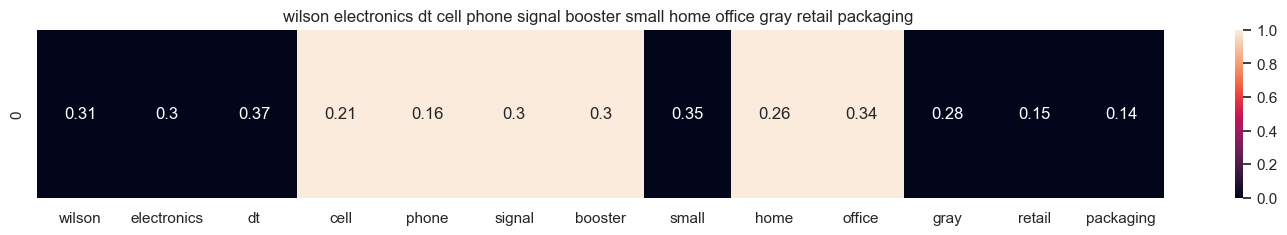

ASIN : B0014KOB6Y
Eucliden distance from the given image : 1.121599645342774


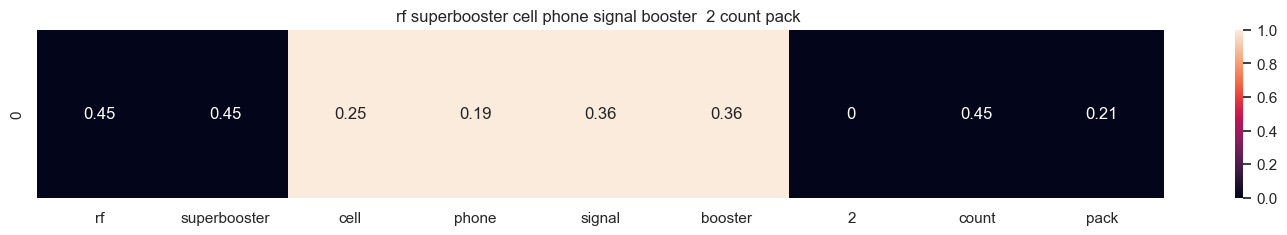

ASIN : B003RRYAM2
Eucliden distance from the given image : 1.2203000754638256


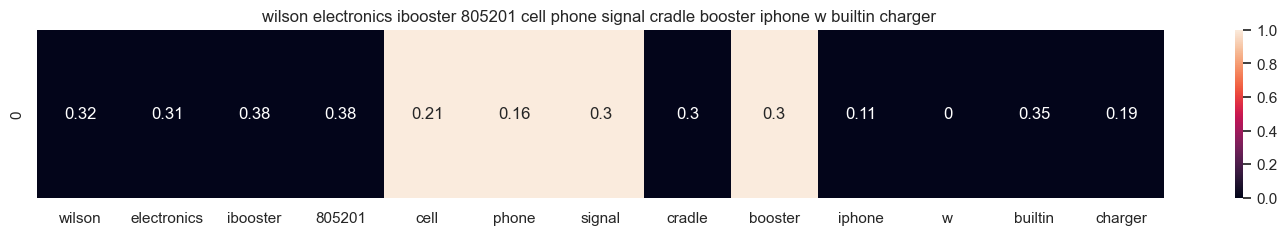

ASIN : B0023RRCPY
Eucliden distance from the given image : 1.2509592793462936


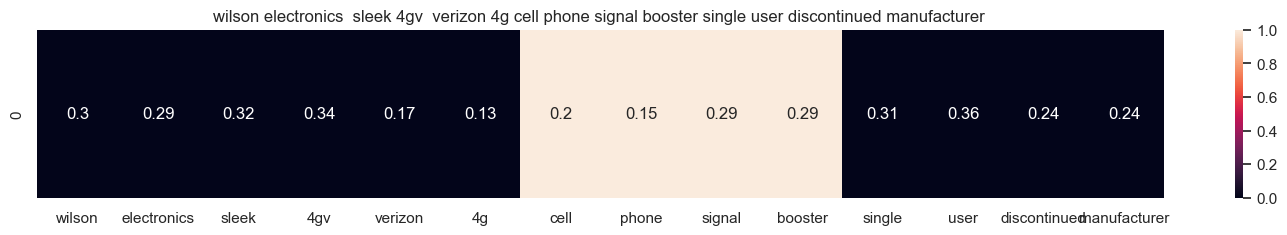

ASIN : B003NQ5NWI
Eucliden distance from the given image : 1.2613822481252137


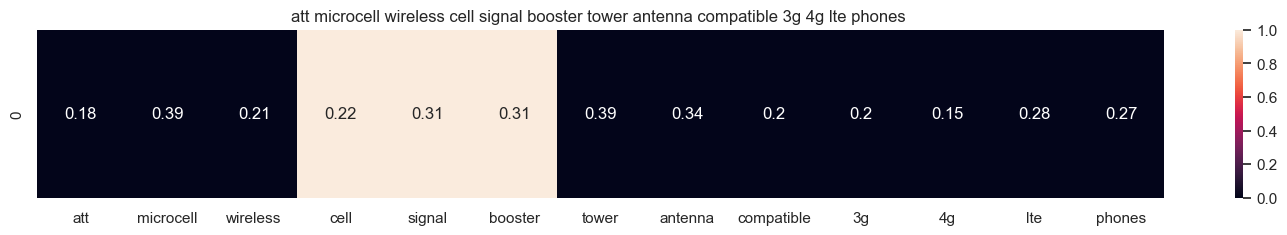

ASIN : B004F1F9P6
Eucliden distance from the given image : 1.264695312362901


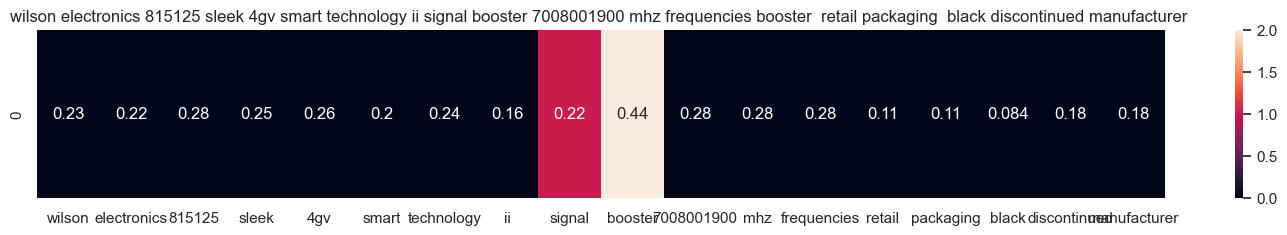

ASIN : B003NQ7RZY
Eucliden distance from the given image : 1.2880922956097922


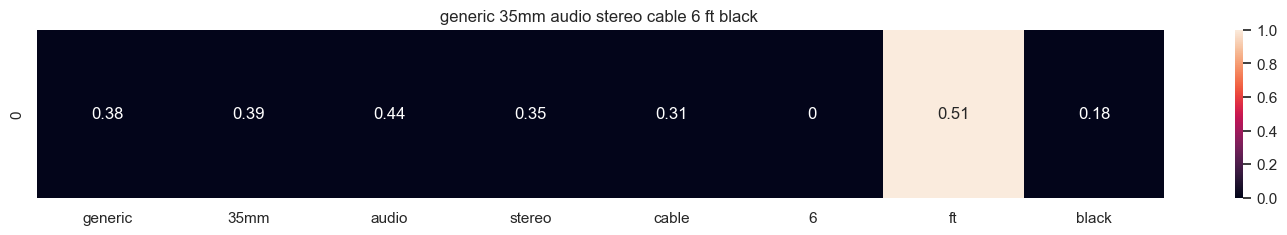

ASIN : B0040UYG3I
Eucliden distance from the given image : 1.3084377256336546


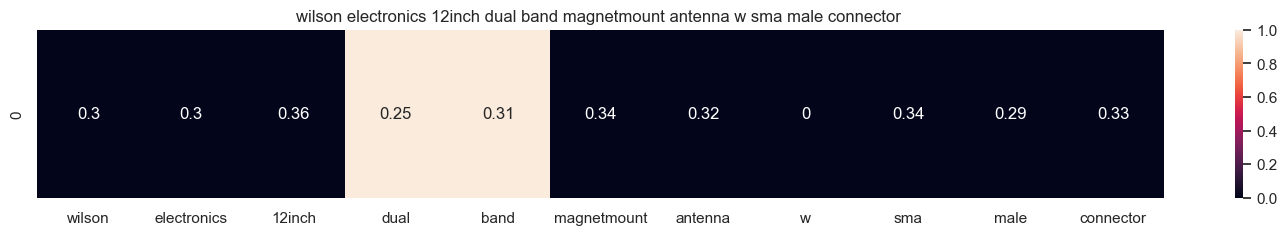

ASIN : B0018PS4O0
Eucliden distance from the given image : 1.3117143638000166


['B0014KOB6Y',
 'B003RRYAM2',
 'B0023RRCPY',
 'B003NQ5NWI',
 'B004F1F9P6',
 'B003NQ7RZY',
 'B0040UYG3I',
 'B0018PS4O0']

In [30]:
def tfidfModel(docID, numResults):
    lt = []
    pairwise_dist = pairwise_distances(tfidf_title_features, tfidf_title_features[docID])
    indices = np.argsort(pairwise_dist.flatten())[0:numResults+5]
    pdists = np.sort(pairwise_dist.flatten())[0:numResults+5]
    dfIndices = list(reviewsUnique.index[indices])
    for i in range(0, len(indices)):
        if(pdists[i] != 0.0):
            getResults(indices[i], reviewsUnique['title'].loc[dfIndices[0]], reviewsUnique['title'].loc[dfIndices[i]], 'tfidf')
            lt.append(reviewsUnique['asin'].loc[dfIndices[i]])
            print('ASIN :',reviewsUnique['asin'].loc[dfIndices[i]])
            print ('Eucliden distance from the given image :', pdists[i])
            print('='*100)
    return lt
tfidfModel(1,5)

In [31]:
reviewsUniqueCopy = reviewsUnique.copy().reset_index()
print(reviewsUniqueCopy['asin'])

0       B003VOW5WI
1       B003U4TLL2
2       B0048IZL5E
3       B006R94O7I
4       B006UYDCI2
           ...    
1179    B0058RLD9C
1180    B0076S4ZG4
1181    B00629POXG
1182    B004TGZ6SW
1183    B005GGBYJ4
Name: asin, Length: 1184, dtype: object


Enter your choice: 5


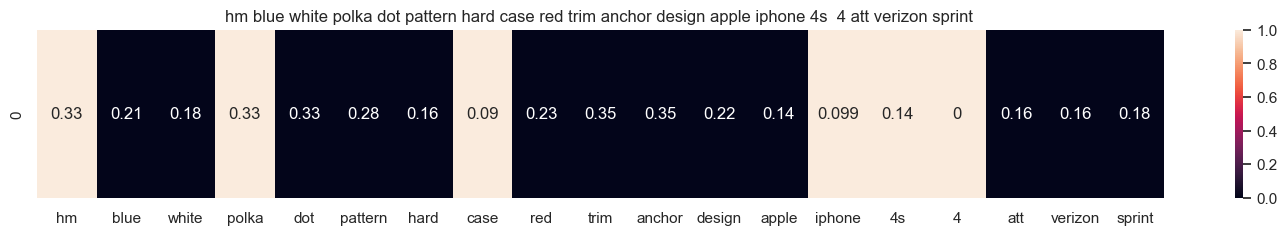

ASIN : B006USTXKO
Eucliden distance from the given image : 1.1862129475780714


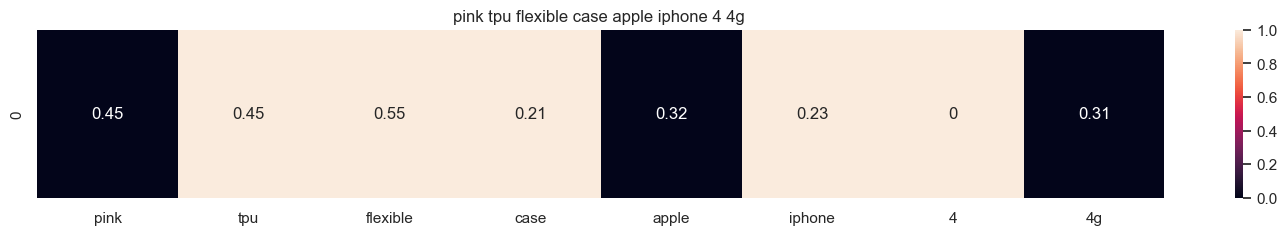

ASIN : B0042QTEIW
Eucliden distance from the given image : 1.1890985246119952


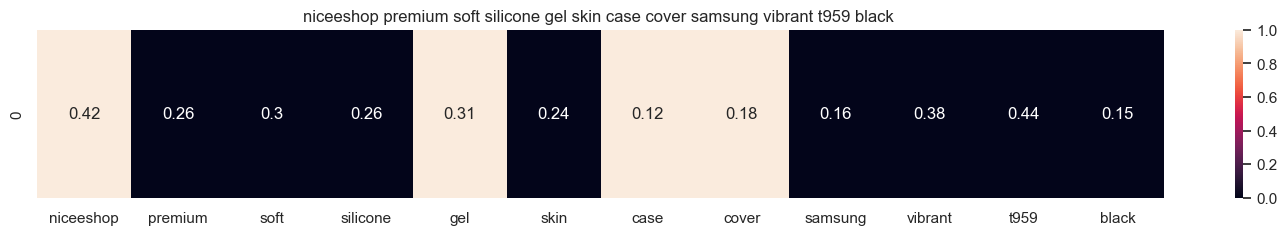

ASIN : B003XNGY2Y
Eucliden distance from the given image : 1.2058040134507473


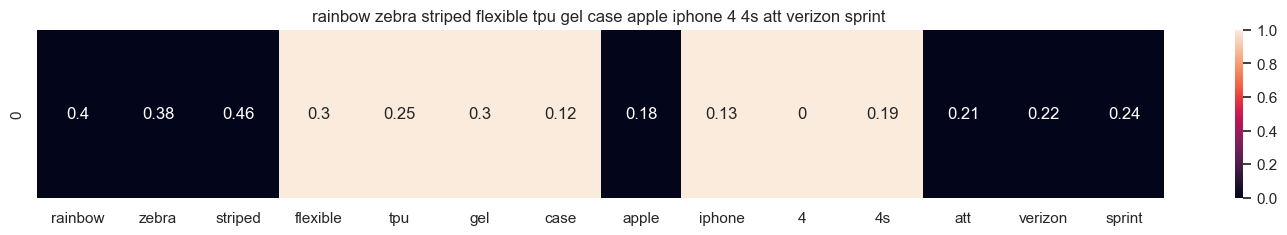

ASIN : B006AO200I
Eucliden distance from the given image : 1.2077798000307425


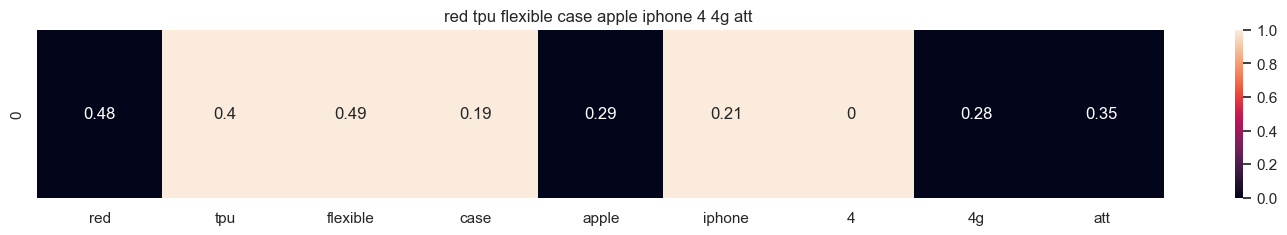

ASIN : B0042QP9NQ
Eucliden distance from the given image : 1.21358503317611


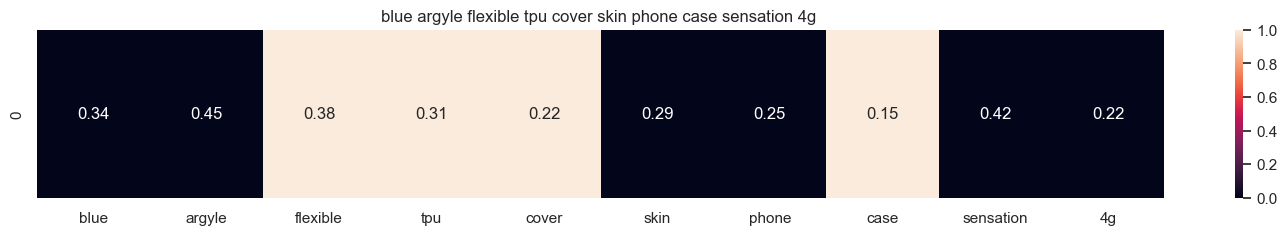

ASIN : B00554NIYQ
Eucliden distance from the given image : 1.248328383149876


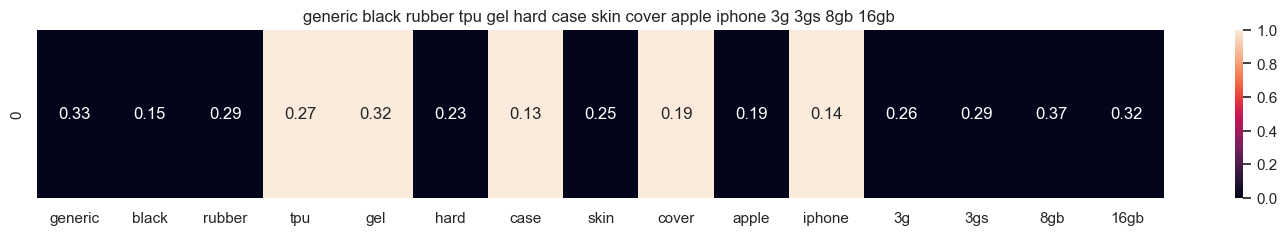

ASIN : B0055AGUMW
Eucliden distance from the given image : 1.2644925158392077


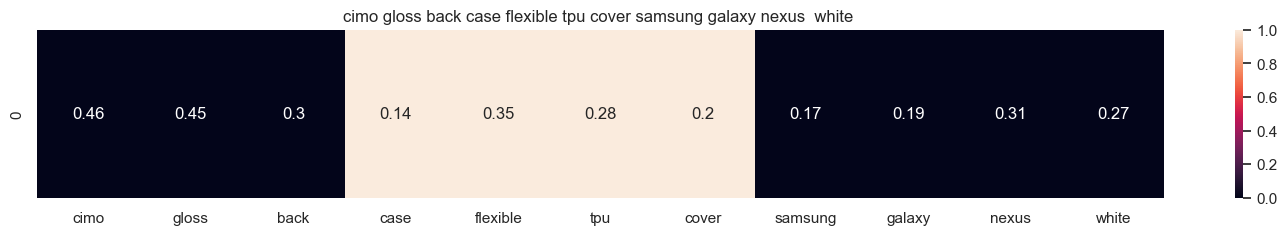

ASIN : B006YYX9B8
Eucliden distance from the given image : 1.2649863328927446


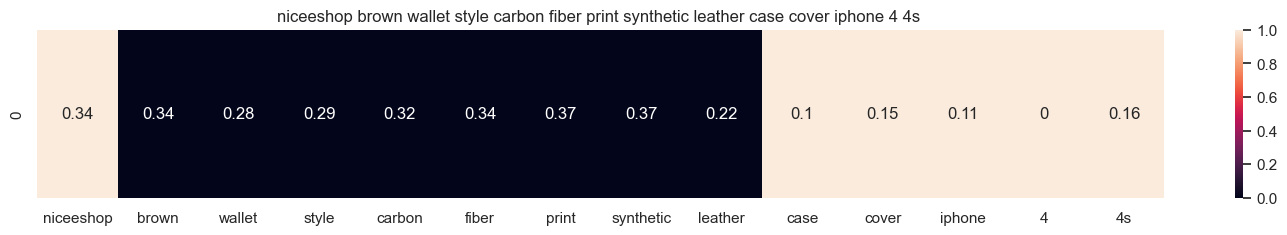

ASIN : B007OBVFRU
Eucliden distance from the given image : 1.2711120688387192


In [32]:
ip = int(input("Enter your choice: "))
lt = tfidfModel(ip, 5)

In [33]:
lts = pd.DataFrame(lt)
lts.rename(columns = {0:'asin'}, inplace = True)

In [34]:
found = pd.merge(lts, features, how = "inner", on = "asin")
temp = pd.DataFrame(features.columns[1:])

In [35]:
temp

,0
0,battery
1,button
2,cable
3,call
4,car
5,case
6,charge
7,charger
8,color
9,cover


In [37]:
print("Priority1: ")
c1 = int(input())
s1 = temp[0][c1]

Priority1: 
39


In [39]:
print("Priority2: ")
c2 = int(input())
s2 = temp[0][c2]

Priority2: 
0


In [40]:
print("Priority3: ")
c3 = int(input())
s3 = temp[0][c3]

Priority3: 
24


In [41]:
found.sort_values(by=[s1, s2, s3], ascending=False)

,asin,battery,button,cable,call,car,case,charge,charger,color,...,size,something,sound,thing,time,unit,use,volume,way,work
5,B00554NIYQ,0,3,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
7,B006YYX9B8,1,0,0,0,0,17,0,0,1,...,0,1,0,1,1,0,0,1,0,0
6,B0055AGUMW,0,1,0,0,0,58,0,0,4,...,0,2,0,-1,11,0,2,0,1,5
1,B0042QTEIW,0,2,0,0,0,37,1,2,11,...,0,1,0,1,1,0,1,0,4,1
8,B007OBVFRU,0,0,0,0,0,32,0,0,6,...,0,1,0,0,6,0,4,0,2,0
0,B006USTXKO,0,0,0,0,0,32,0,0,0,...,0,0,0,-1,4,0,1,0,-1,0
2,B003XNGY2Y,0,0,0,0,0,20,0,0,1,...,0,1,1,0,1,0,0,2,0,0
4,B0042QP9NQ,0,0,0,0,0,20,0,0,5,...,0,0,0,0,2,0,0,0,2,0
3,B006AO200I,0,2,0,0,0,2,0,0,2,...,0,0,0,0,0,0,2,3,0,0
